# Feature selection Complexity evaluation: Artificial datasets

In [1]:
import pandas as pd
import copy
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from skrebate import ReliefF
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import glob
import re



In [2]:
import os
os.chdir("..")
root_path = os.getcwd()

In [3]:
# # Cargar la tabla de comparación del dataset
# comparison_table = pd.read_csv("Results_FS_ComplexityEvaluation/ArtificialDataset1_comparisonTable.csv", index_col=[0,1])
#
# comparison_table.head()
# display(comparison_table.style.background_gradient(cmap="viridis"))

In [4]:
# Leer todos los comparison.csv de la carpeta
files = glob.glob("Results_FS_ComplexityEvaluation/*_comparisonTable.csv")

all_tables = []
for f in files:
    df = pd.read_csv(f, index_col=[0,1])
    all_tables.append(df)

comparison_all = pd.concat(all_tables)
comparison_all.head()


Hostility       kDN  \
Dataset             Subset                                                 
ArtificialDataset13 all                               0.219333  0.303600   
                    informative                       0.154667  0.258200   
                    informative+redundant             0.208333  0.284733   
                    informative+redundant_nonLinear   0.210667  0.284267   
                    informative+noise                 0.240333  0.364133   

                                                          DCP      TD_U  \
Dataset             Subset                                                
ArtificialDataset13 all                              0.282100  0.572650   
                    informative                      0.321204  0.590860   
                    informative+redundant            0.294066  0.542079   
                    informative+redundant_nonLinear  0.281780  0.602611   
                    informative+noise                0.305211  0.562383   

                                                          CLD        N1  \
Dataset             Subset                                                
ArtificialDataset13 all                              0.446437  0.274148   
                    informative                      0.452713  0.232287   
                    informative+redundant            0.441277  0.246267   
                    informative+redundant_nonLinear  0.455501  0.263774   
                    informative+noise                0.455043  0.331338   

                                                           N2       LSC  \
Dataset             Subset                                                
ArtificialDataset13 all                              0.490742  0.997935   
                    informative                      0.477267  0.997368   
                    informative+redundant            0.482888  0.997663   
                    informative+redundant_nonLinear  0.482723  0.997637   
                    informative+noise                0.493723  0.998632   

                                                           F1        L1  \
Dataset             Subset                                                
ArtificialDataset13 all                              0.997733  0.410116   
                    informative                      0.997920  0.370419   
                    informative+redundant            0.997648  0.349135   
                    informative+redundant_nonLinear  0.997739  0.430147   
                    informative+noise                0.997982  0.385616   

                                                     n_features best_model  \
Dataset             Subset                                                   
ArtificialDataset13 all                                   115.0    SVM-rbf   
                    informative                            25.0    SVM-rbf   
                    informative+redundant                  55.0    SVM-rbf   
                    informative+redundant_nonLinear        55.0    SVM-rbf   
                    informative+noise                      55.0    SVM-rbf   

                                                     best_acc  best_gps  
Dataset             Subset                                               
ArtificialDataset13 all                              0.832333  0.823720  
                    informative                      0.874333  0.869020  
                    informative+redundant            0.855000  0.848395  
                    informative+redundant_nonLinear  0.824667  0.815915  
                    informative+noise                0.810667  0.799405

## Artificial Dataset 1

- Nº muestras: 1000
- Características: 10 informativas, 2 ruido, 4 redundantes lineales, 2 redundantes no lineales --> 18 en total
- Separabilidad (class_sep): 1 (alta)
- Ruido en etiquetas (flip_y): 0
- Clusters/clase: 1
- Balance de clases: [0.5, 0.5] (equilibrado)
- Ruido adicional (noise_std): 0.01

In [5]:
# comparison_all.loc['ArtificialDataset1']
display(comparison_all.loc['ArtificialDataset1'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.053000,0.067600,0.014592,0.683000,0.130850,0.051136,0.400369,0.957305,0.974167,0.827546,18.000000,SVM-rbf,0.985000,0.985000
informative,0.030000,0.051000,0.016597,0.599091,0.146010,0.033283,0.373701,0.944228,0.974700,0.695393,10.000000,SVM-rbf,0.990000,0.990000
informative+redundant,0.034000,0.052600,0.071380,0.634091,0.160102,0.033033,0.372805,0.944834,0.971857,0.213365,14.000000,SVM-rbf,0.985000,0.985000
informative+redundant_nonLinear,0.033000,0.053800,0.044297,0.645200,0.122669,0.034333,0.378490,0.954427,0.973750,0.720168,12.000000,SVM-rbf,0.988000,0.988000
informative+noise,0.042000,0.066400,0.098407,0.550667,0.141574,0.043424,0.407718,0.962517,0.978167,0.664564,12.000000,SVM-rbf,0.985000,0.985000
informative+rand_extra,0.041000,0.061600,0.115777,0.651909,0.156166,0.048252,0.389093,0.950224,0.971462,0.806370,13.000000,SVM-rbf,0.988000,0.988000
mutual_info_top10,0.062000,0.078000,0.079583,0.535615,0.138735,0.073167,0.364963,0.951343,0.959200,0.487987,10.000000,SVM-rbf,0.966000,0.965999
f_classif_top10,0.085000,0.101400,0.121962,0.569000,0.156301,0.078262,0.379290,0.949639,0.964400,0.568725,10.000000,SVM-rbf,0.953000,0.952989
rf_top10,0.054000,0.056800,0.075895,0.588833,0.134775,0.050867,0.353003,0.934391,0.960600,0.529653,10.000000,SVM-rbf,0.974000,0.974000


## Artificial Dataset 2

 - Nº muestras: 1000
 - Características: 10 informativas, 2 ruido, 4 redundantes lineales, 2 redundantes no lineales --> 18 en total
 - Separabilidad (class_sep): 0.6 (más difícil de separar)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [6]:
display(comparison_all.loc['ArtificialDataset2'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.119000,0.124600,0.017584,0.586462,0.223553,0.095390,0.422998,0.975741,0.982056,0.514070,18.000000,SVM-rbf,0.967000,0.966999
informative,0.078000,0.107400,0.088088,0.593333,0.249648,0.067752,0.402904,0.971353,0.983600,0.422721,10.000000,SVM-rbf,0.977000,0.976999
informative+redundant,0.083000,0.114800,0.071020,0.582846,0.263726,0.093226,0.402589,0.971677,0.982000,0.503090,14.000000,SVM-rbf,0.967000,0.967000
informative+redundant_nonLinear,0.066000,0.109200,0.060523,0.623583,0.224099,0.083550,0.403429,0.973709,0.981167,0.431576,12.000000,SVM-rbf,0.970000,0.969994
informative+noise,0.101000,0.137400,0.088088,0.597500,0.245478,0.090355,0.429860,0.979780,0.985583,0.450263,12.000000,SVM-rbf,0.965000,0.964998
informative+rand_extra,0.091000,0.126000,0.076374,0.598154,0.254149,0.092169,0.417547,0.975601,0.982077,0.501690,13.000000,SVM-rbf,0.962000,0.961994
mutual_info_top10,0.111000,0.147400,0.146688,0.483000,0.233970,0.137000,0.396735,0.970561,0.974700,0.109500,10.000000,RandomForest,0.919000,0.918993
f_classif_top10,0.165000,0.188400,0.154398,0.460625,0.278496,0.170300,0.419076,0.977884,0.978600,0.565846,10.000000,SVM-rbf,0.895000,0.894938
rf_top10,0.085000,0.113400,0.103673,0.594667,0.229343,0.104533,0.384135,0.958355,0.973700,0.068930,10.000000,SVM-rbf,0.946000,0.946000


## Artificial Dataset 3

 - Nº muestras: 1000
 - Características: 25 informativas, 5 ruido, 7 redundantes lineales, 8 redundantes no lineales --> 45 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [7]:
display(comparison_all.loc['ArtificialDataset3'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.075000,0.093800,0.067889,0.651231,0.146585,0.058518,0.457602,0.976888,0.988822,1.311366,45.000000,SVM-rbf,0.980000,0.979998
informative,0.056000,0.076800,0.004889,0.652923,0.140096,0.037496,0.445379,0.968942,0.986720,0.818155,25.000000,SVM-rbf,0.993000,0.993000
informative+redundant,0.041000,0.076000,0.116916,0.660692,0.128885,0.050116,0.445412,0.969743,0.987812,1.136142,32.000000,SVM-rbf,0.989000,0.989000
informative+redundant_nonLinear,0.095000,0.085800,0.063444,0.638385,0.171068,0.049038,0.447555,0.974094,0.987636,0.852132,33.000000,SVM-rbf,0.978000,0.977997
informative+noise,0.070000,0.100400,0.067468,0.653308,0.141118,0.072137,0.459966,0.977409,0.987700,0.815994,30.000000,SVM-rbf,0.987000,0.987000
informative+rand_extra,0.073000,0.079200,0.092549,0.659231,0.151275,0.049240,0.449359,0.972810,0.986536,0.845118,28.000000,SVM-rbf,0.990000,0.990000
mutual_info_top25,0.078000,0.093600,0.100739,0.642692,0.150114,0.067980,0.440411,0.968158,0.985840,1.193970,25.000000,SVM-rbf,0.976000,0.975994
f_classif_top25,0.103000,0.120400,0.113151,0.644538,0.161668,0.099404,0.444032,0.973198,0.986240,1.216356,25.000000,SVM-rbf,0.948000,0.947995
rf_top25,0.069000,0.095400,0.106385,0.645923,0.150725,0.073163,0.436885,0.966267,0.985880,1.250675,25.000000,SVM-rbf,0.970000,0.969994


## Artificial Dataset 4

 - Nº muestras: 5000
 - Características: 15 informativas, 15 ruido, 4 redundantes lineales, 5 redundantes no lineales --> 39 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [8]:
display(comparison_all.loc['ArtificialDataset4'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.051400,0.070200,0.069604,0.591400,0.135136,0.055907,0.453021,0.986881,0.996000,1.235161,39.000000,SVM-rbf,0.984400,0.984400
informative,0.017000,0.026120,0.068687,0.607129,0.111095,0.019746,0.390056,0.966053,0.994013,0.934909,15.000000,SVM-rbf,0.992200,0.992200
informative+redundant,0.022600,0.030320,0.071504,0.652338,0.117719,0.021621,0.388564,0.962146,0.993758,1.148255,19.000000,SVM-rbf,0.990400,0.990400
informative+redundant_nonLinear,0.019200,0.030760,0.062060,0.646625,0.152815,0.023953,0.394596,0.972049,0.994450,0.946523,20.000000,SVM-rbf,0.990800,0.990800
informative+noise,0.059400,0.090800,0.070670,0.646424,0.110685,0.073674,0.462659,0.992850,0.996467,0.938998,30.000000,SVM-rbf,0.983000,0.982999
informative+rand_extra,0.026600,0.035560,0.070708,0.605624,0.112943,0.028737,0.410345,0.975765,0.994822,0.934111,18.000000,SVM-rbf,0.989400,0.989400
mutual_info_top15,0.041000,0.059000,0.082380,0.553800,0.131712,0.053050,0.389859,0.968821,0.992000,1.055809,15.000000,SVM-rbf,0.977200,0.977200
f_classif_top15,0.048400,0.066360,0.084325,0.597094,0.143144,0.056730,0.388710,0.970778,0.992600,1.139477,15.000000,SVM-rbf,0.972600,0.972600
rf_top15,0.034800,0.048640,0.072787,0.572722,0.135241,0.039945,0.383873,0.962935,0.992253,1.010122,15.000000,SVM-rbf,0.984200,0.984200


## Artificial Dataset 5

 - Nº muestras: 5000
 - Características: 25 informativas, 15 ruido, 8 redundantes lineales, 7 redundantes no lineales --> 55 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [9]:
display(comparison_all.loc['ArtificialDataset5'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.045200,0.063200,0.070005,0.738907,0.137243,0.041427,0.462571,0.991320,0.996404,0.998180,55.000000,SVM-rbf,0.996800,0.996800
informative,0.017000,0.026640,0.074001,0.733243,0.101268,0.017326,0.430886,0.981555,0.994920,0.967018,25.000000,SVM-rbf,0.998000,0.998000
informative+redundant,0.024200,0.036280,0.071639,0.695707,0.124553,0.020636,0.434550,0.985093,0.995315,0.660136,33.000000,SVM-rbf,0.997600,0.997600
informative+redundant_nonLinear,0.019400,0.029920,0.074975,0.679987,0.129097,0.017577,0.432019,0.982881,0.995256,0.946439,32.000000,SVM-rbf,0.996400,0.996400
informative+noise,0.048800,0.079920,0.071905,0.711787,0.102473,0.057720,0.467393,0.993351,0.996365,0.929800,40.000000,SVM-rbf,0.996000,0.996000
informative+rand_extra,0.022600,0.033120,0.074361,0.730600,0.102533,0.020596,0.439285,0.984428,0.995214,0.954220,28.000000,SVM-rbf,0.997800,0.997800
mutual_info_top25,0.037200,0.051440,0.084911,0.655682,0.137398,0.040043,0.427767,0.980090,0.993624,0.783402,25.000000,SVM-rbf,0.991200,0.991200
f_classif_top25,0.057200,0.063360,0.089590,0.680612,0.141000,0.047219,0.433377,0.981745,0.993960,0.741196,25.000000,SVM-rbf,0.989000,0.989000
rf_top25,0.028200,0.038360,0.075603,0.728907,0.137670,0.027572,0.417874,0.976975,0.993624,0.942469,25.000000,SVM-rbf,0.992200,0.992200


## Artificial Dataset 6

 - Nº muestras: 10000
 - Características: 8 informativas, 15 ruido, 4 redundantes lineales, 5 redundantes no lineales --> 32 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [10]:
display(comparison_all.loc['ArtificialDataset6'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.026000,0.041540,0.021839,0.501524,0.072115,0.036949,0.436539,0.987601,0.990166,1.196410,32.000000,SVM-linear,0.998400,0.998400
informative,0.003300,0.004500,0.036050,0.675800,0.033655,0.003812,0.268677,0.924672,0.989012,0.995970,8.000000,SVM-rbf,0.998900,0.998900
informative+redundant,0.003300,0.007040,0.024020,0.626171,0.087189,0.006210,0.282067,0.950230,0.986558,1.104500,12.000000,SVM-rbf,0.998800,0.998800
informative+redundant_nonLinear,0.003600,0.005920,0.023555,0.606731,0.077132,0.005865,0.272946,0.923957,0.982123,1.065472,13.000000,SVM-rbf,0.998600,0.998600
informative+noise,0.046300,0.065580,0.036050,0.617800,0.033540,0.053962,0.454241,0.995771,0.995791,1.008324,23.000000,SVM-linear,0.998500,0.998500
informative+rand_extra,0.006500,0.009520,0.035588,0.677693,0.049166,0.008868,0.331454,0.955937,0.991745,1.018106,11.000000,SVM-rbf,0.999000,0.999000
mutual_info_top8,0.003700,0.009340,0.022310,0.517386,0.088160,0.008170,0.237009,0.931346,0.966350,1.151702,8.000000,SVM-linear,0.997600,0.997600
f_classif_top8,0.005300,0.011960,0.029644,0.516873,0.091044,0.010637,0.241843,0.946227,0.980213,1.153502,8.000000,SVM-linear,0.997300,0.997300
rf_top8,0.004700,0.007020,0.024682,0.577785,0.046384,0.007183,0.223549,0.892870,0.964463,1.124101,8.000000,SVM-rbf,0.998200,0.998200


## Artificial Dataset 7

 - Nº muestras: 1000
 - Características: 20 informativas, 10 ruido, 10 redundantes lineales, 10 redundantes no lineales --> 50 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [11]:
display(comparison_all.loc['ArtificialDataset7'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.036000,0.053800,0.057824,0.708273,0.117457,0.031383,0.445424,0.959711,0.986100,1.338937,50.000000,SVM-rbf,0.996000,0.996000
informative,0.008000,0.027200,0.047885,0.740700,0.067308,0.018279,0.411489,0.931018,0.981650,1.009091,20.000000,SVM-rbf,0.999000,0.999000
informative+redundant,0.032000,0.034200,0.040974,0.700455,0.096647,0.017243,0.413545,0.940421,0.983233,1.095114,30.000000,SVM-rbf,1.000000,1.000000
informative+redundant_nonLinear,0.047000,0.032200,0.046247,0.683273,0.097992,0.016926,0.416217,0.941339,0.983167,1.090441,30.000000,SVM-rbf,0.997000,0.997000
informative+noise,0.049000,0.062200,0.051221,0.658154,0.069280,0.048519,0.453899,0.968383,0.985967,1.013354,30.000000,SVM-rbf,0.997000,0.997000
informative+rand_extra,0.010000,0.031400,0.056568,0.713727,0.073469,0.025265,0.419688,0.941006,0.982478,1.041631,23.000000,SVM-rbf,0.999000,0.999000
mutual_info_top20,0.040000,0.046200,0.042031,0.711727,0.100209,0.039433,0.398437,0.930962,0.976300,1.114214,20.000000,SVM-rbf,0.992000,0.991999
f_classif_top20,0.032000,0.041200,0.041620,0.734100,0.088976,0.030242,0.394613,0.929431,0.975900,0.789292,20.000000,SVM-rbf,0.988000,0.988000
rf_top20,0.032000,0.034400,0.041892,0.763100,0.095516,0.026110,0.393492,0.932988,0.976750,0.854760,20.000000,SVM-rbf,0.992000,0.992000


## Artificial Dataset 8

 - Nº muestras: 1000
 - Características: 40 informativas, 15 ruido, 15 redundantes lineales, 15 redundantes no lineales --> 85 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.1

In [12]:
display(comparison_all.loc['ArtificialDataset8'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.128000,0.176600,0.255695,0.652000,0.275554,0.129847,0.478692,0.987226,0.991965,1.090318,85.000000,SVM-rbf,0.951000,0.950968
informative,0.053000,0.128000,0.206128,0.616000,0.224660,0.091075,0.468715,0.983293,0.991350,0.788417,40.000000,SVM-rbf,0.985000,0.984999
informative+redundant,0.123000,0.147600,0.077575,0.643750,0.259294,0.106194,0.469732,0.985064,0.991364,0.861586,55.000000,SVM-rbf,0.964000,0.963990
informative+redundant_nonLinear,0.124000,0.146800,0.125087,0.672231,0.263214,0.097378,0.469973,0.984499,0.991636,0.855719,55.000000,SVM-rbf,0.964000,0.963982
informative+noise,0.120000,0.180800,0.206128,0.616214,0.225714,0.118507,0.480132,0.989130,0.992000,0.798303,55.000000,SVM-rbf,0.969000,0.968993
informative+rand_extra,0.083000,0.131400,0.140134,0.639857,0.231087,0.093153,0.469016,0.983543,0.991488,0.805808,43.000000,SVM-rbf,0.981000,0.980999
mutual_info_top40,0.170000,0.213600,0.255695,0.563067,0.281582,0.179189,0.471957,0.987146,0.990725,1.325917,40.000000,SVM-rbf,0.912000,0.911935
f_classif_top40,0.173000,0.203800,0.255695,0.649250,0.280236,0.187630,0.470602,0.986627,0.991050,0.370793,40.000000,SVM-rbf,0.915000,0.914858
rf_top40,0.189000,0.175000,0.144856,0.533733,0.274082,0.147699,0.465574,0.984932,0.990050,0.897834,40.000000,SVM-rbf,0.928000,0.927920


## Artificial Dataset 9

 - Nº muestras: 3000
 - Características: 10 informativas, 20 ruido, 20 redundantes lineales, 20 redundantes no lineales --> 70 en total
 - Separabilidad: 0.7 (moderada)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.3

In [13]:
display(comparison_all.loc['ArtificialDataset9'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.095333,0.121067,0.108383,0.627511,0.314066,0.095396,0.458585,0.986819,0.991962,0.486696,70.000000,XGBoost,0.963000,0.963000
informative,0.043333,0.068600,0.070806,0.536417,0.247868,0.057011,0.383627,0.970831,0.988700,0.492368,10.000000,SVM-rbf,0.977667,0.977666
informative+redundant,0.069333,0.084867,0.064838,0.649133,0.319023,0.063540,0.409137,0.980127,0.988967,0.668633,30.000000,XGBoost,0.967667,0.967667
informative+redundant_nonLinear,0.084333,0.087533,0.121917,0.633714,0.281394,0.068062,0.409402,0.979809,0.989978,0.473403,30.000000,XGBoost,0.964000,0.963999
informative+noise,0.182667,0.236667,0.063926,0.535157,0.247209,0.201594,0.481259,0.996496,0.994767,0.461720,30.000000,XGBoost,0.957000,0.956999
informative+rand_extra,0.064333,0.079933,0.069412,0.481895,0.284847,0.063162,0.395223,0.977713,0.989872,0.462022,13.000000,SVM-rbf,0.969000,0.968997
mutual_info_top10,0.131000,0.163733,0.122040,0.557529,0.268825,0.146147,0.406011,0.979306,0.979600,0.801452,10.000000,SVM-rbf,0.888333,0.888314
f_classif_top10,0.125667,0.164200,0.115777,0.502685,0.341147,0.150329,0.409645,0.983070,0.988700,0.732240,10.000000,SVM-rbf,0.898000,0.897978
rf_top10,0.123000,0.141800,0.096367,0.512500,0.235542,0.135241,0.396977,0.976811,0.978600,0.685279,10.000000,SVM-rbf,0.916667,0.916651


## Artificial Dataset 10

 - Nº muestras: 2000
 - Características: 6 informativas, 20 ruido, 20 redundantes lineales, 15 redundantes no lineales --> 61 en total
 - Separabilidad: 0.8
 - Ruido en etiquetas: 0
 - Clusters/clase: 2
 - Balance: [0.3, 0.7] (desbalanceado)
 - Ruido adicional: 0.3

In [14]:
display(comparison_all.loc['ArtificialDataset10'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.115500,0.158400,0.131401,0.717500,0.312744,0.153678,0.457392,0.981472,0.991574,0.563725,61.000000,XGBoost,0.917000,0.894530
informative,0.079500,0.125100,0.159981,0.575167,0.280286,0.119875,0.364366,0.970477,0.988167,0.665170,6.000000,SVM-rbf,0.926500,0.904188
informative+redundant,0.093000,0.137300,0.172058,0.563594,0.318785,0.115033,0.401360,0.975433,0.988000,0.525712,26.000000,XGBoost,0.911500,0.888649
informative+redundant_nonLinear,0.118500,0.137600,0.163253,0.628500,0.308149,0.122238,0.403353,0.975894,0.990333,0.635005,21.000000,RandomForest,0.911000,0.885123
informative+noise,0.229000,0.286000,0.159981,0.622687,0.280023,0.264936,0.483063,0.996408,0.994577,0.670839,26.000000,XGBoost,0.905000,0.878846
informative+rand_extra,0.109000,0.130700,0.151666,0.493750,0.320133,0.118350,0.375710,0.975630,0.987222,0.679638,9.000000,XGBoost,0.913500,0.891227
mutual_info_top6,0.131500,0.190700,0.170884,0.550333,0.283375,0.179933,0.398230,0.983496,0.986750,1.544125,6.000000,XGBoost,0.867500,0.829988
f_classif_top6,0.182500,0.239200,0.259523,0.546158,0.310672,0.241450,0.420356,0.990419,0.985083,1.604318,6.000000,RandomForest,0.824500,0.765831
rf_top6,0.117500,0.154200,0.146508,0.577094,0.251069,0.143767,0.362956,0.974522,0.991167,0.888374,6.000000,XGBoost,0.891000,0.861091


## Artificial Dataset 11

 - Nº muestras: 3000
 - Características: 20 informativas, 20 ruido, 20 redundantes lineales, 15 redundantes no lineales --> 75 en total
 - Separabilidad: 0.6 (difícil)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.1

In [15]:
display(comparison_all.loc['ArtificialDataset11'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.102667,0.134067,0.137145,0.617278,0.313331,0.098857,0.467980,0.992091,0.994827,0.435555,75.000000,SVM-rbf,0.969667,0.968148
informative,0.057667,0.096600,0.174364,0.549833,0.274323,0.061933,0.442667,0.989020,0.994350,0.571514,20.000000,SVM-rbf,0.985667,0.985050
informative+redundant,0.077333,0.097933,0.082306,0.632574,0.294132,0.062466,0.440410,0.988053,0.993275,1.027321,40.000000,SVM-rbf,0.984000,0.983313
informative+redundant_nonLinear,0.090667,0.114133,0.162890,0.601078,0.323926,0.089169,0.446957,0.990826,0.994686,0.482813,35.000000,SVM-rbf,0.963333,0.961479
informative+noise,0.152333,0.216800,0.174364,0.583981,0.274573,0.181821,0.481774,0.996506,0.996025,0.574145,40.000000,SVM-rbf,0.950667,0.948137
informative+rand_extra,0.074000,0.094933,0.171039,0.547444,0.284160,0.066343,0.442010,0.988446,0.994116,0.536003,23.000000,SVM-rbf,0.976667,0.975600
mutual_info_top20,0.146667,0.175867,0.200009,0.538733,0.332158,0.143918,0.447965,0.991773,0.991183,0.763727,20.000000,SVM-rbf,0.936667,0.933037
f_classif_top20,0.143667,0.179267,0.107852,0.560389,0.335749,0.157752,0.449300,0.992544,0.991383,0.570906,20.000000,SVM-rbf,0.940667,0.937365
rf_top20,0.117000,0.153667,0.100421,0.486950,0.284050,0.137669,0.443139,0.990479,0.991250,0.383535,20.000000,SVM-rbf,0.941333,0.938030


## Artificial Dataset 12

 - Nº muestras: 3000
 - Características: 25 informativas, 30 ruido, 30 redundantes lineales, 30 redundantes no lineales --> 115 en total
 - Separabilidad: 0.9
 - Ruido en etiquetas: 0.2 (20%)
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [16]:
display(comparison_all.loc['ArtificialDataset12'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.178000,0.271000,0.305528,0.555173,0.380491,0.253213,0.488572,0.997334,0.997519,0.473568,115.000000,SVM-rbf,0.871000,0.864941
informative,0.143000,0.234333,0.278586,0.535712,0.346237,0.213641,0.474360,0.996675,0.997480,0.482905,25.000000,SVM-rbf,0.886333,0.881665
informative+redundant,0.161667,0.250000,0.305343,0.572188,0.362974,0.232888,0.480144,0.997097,0.997539,0.458568,55.000000,SVM-rbf,0.878000,0.872536
informative+redundant_nonLinear,0.178667,0.256733,0.341377,0.490160,0.385091,0.232103,0.480117,0.997052,0.997212,0.521940,55.000000,SVM-rbf,0.868333,0.861908
informative+noise,0.203667,0.309533,0.322540,0.525551,0.349617,0.292228,0.491331,0.998033,0.997770,0.498972,55.000000,SVM-rbf,0.866000,0.859095
informative+rand_extra,0.145000,0.237000,0.276547,0.523288,0.351661,0.215063,0.476860,0.996754,0.997560,0.482581,28.000000,SVM-rbf,0.884667,0.879867
mutual_info_top25,0.226000,0.311600,0.286292,0.489806,0.380764,0.305363,0.482279,0.997743,0.996387,0.546866,25.000000,SVM-rbf,0.818333,0.807023
f_classif_top25,0.223000,0.297333,0.280797,0.590772,0.380221,0.278638,0.478682,0.997433,0.996547,0.550087,25.000000,SVM-rbf,0.828333,0.817851
rf_top25,0.187333,0.281000,0.281060,0.530522,0.373813,0.266698,0.476230,0.997147,0.996707,0.544483,25.000000,SVM-rbf,0.834333,0.824032


## Artificial Dataset 13

 - Nº muestras: 3000
 - Características: 25 informativas, 30 ruido, 30 redundantes lineales, 30 redundantes no lineales --> 115 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.2
 - Clusters/clase: 2
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [25]:
display(comparison_all.loc['ArtificialDataset13'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.219333,0.303600,0.282100,0.572650,0.446437,0.274148,0.490742,0.997935,0.997733,0.410116,115.000000,SVM-rbf,0.832333,0.823720
informative,0.154667,0.258200,0.321204,0.590860,0.452713,0.232287,0.477267,0.997368,0.997920,0.370419,25.000000,SVM-rbf,0.874333,0.869020
informative+redundant,0.208333,0.284733,0.294066,0.542079,0.441277,0.246267,0.482888,0.997663,0.997648,0.349135,55.000000,SVM-rbf,0.855000,0.848395
informative+redundant_nonLinear,0.210667,0.284267,0.281780,0.602611,0.455501,0.263774,0.482723,0.997637,0.997739,0.430147,55.000000,SVM-rbf,0.824667,0.815915
informative+noise,0.240333,0.364133,0.305211,0.562383,0.455043,0.331338,0.493723,0.998632,0.997982,0.385616,55.000000,SVM-rbf,0.810667,0.799405
informative+rand_extra,0.166000,0.272733,0.311265,0.527015,0.452961,0.247381,0.480934,0.997601,0.997976,0.376886,28.000000,SVM-rbf,0.874000,0.868611
mutual_info_top25,0.275333,0.360000,0.372376,0.589717,0.436807,0.341123,0.486237,0.998413,0.997320,0.543365,25.000000,SVM-rbf,0.756667,0.740571
f_classif_top25,0.240667,0.366867,0.359349,0.646315,0.437629,0.361072,0.487096,0.998466,0.997520,0.698449,25.000000,SVM-rbf,0.749667,0.736955
rf_top25,0.213000,0.324667,0.339101,0.555810,0.417269,0.306579,0.482311,0.998039,0.997493,0.593860,25.000000,SVM-rbf,0.795333,0.785458


## Artificial Dataset 14

 - Nº muestras: 3000
 - Características: 30 informativas, 40 ruido, 30 redundantes lineales, 40 redundantes no lineales --> 140 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.2
 - Clusters/clase: 2
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.5

In [26]:
display(comparison_all.loc['ArtificialDataset14'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.217000,0.306800,0.401435,0.482897,0.422532,0.280745,0.491469,0.998061,0.997452,0.493413,140.000000,SVM-rbf,0.834667,0.793980
informative,0.162333,0.273400,0.426914,0.579206,0.415963,0.246886,0.481518,0.997686,0.997400,0.496093,30.000000,SVM-rbf,0.874333,0.850145
informative+redundant,0.224667,0.287133,0.355301,0.536933,0.415968,0.254802,0.483924,0.997823,0.997350,0.474297,60.000000,SVM-rbf,0.852667,0.821601
informative+redundant_nonLinear,0.233667,0.287733,0.426914,0.493080,0.429095,0.259825,0.485633,0.997884,0.997276,0.515489,70.000000,SVM-rbf,0.830667,0.786285
informative+noise,0.261333,0.361267,0.426914,0.589530,0.413451,0.341170,0.493940,0.998556,0.997671,0.500557,70.000000,SVM-rbf,0.795667,0.726874
informative+rand_extra,0.181333,0.277600,0.426914,0.519000,0.419820,0.243829,0.482584,0.997720,0.997404,0.489598,33.000000,SVM-rbf,0.865000,0.836495
mutual_info_top30,0.248000,0.355400,0.400181,0.561565,0.422810,0.343544,0.488477,0.998445,0.997256,0.793757,30.000000,SVM-rbf,0.787000,0.719029
f_classif_top30,0.258000,0.346400,0.385802,0.543884,0.417008,0.331241,0.486780,0.998369,0.996789,0.665201,30.000000,SVM-rbf,0.788667,0.721551
rf_top30,0.236667,0.325400,0.408233,0.505240,0.408424,0.314434,0.485249,0.998135,0.997422,0.671888,30.000000,SVM-rbf,0.803667,0.749678


## Artificial Dataset 15

 - Nº muestras: 5000
 - Características: 40 informativas, 40 ruido, 30 redundantes lineales, 40 redundantes no lineales --> 150 en total
 - Separabilidad: 0.4
 - Ruido en etiquetas: 0.3
 - Clusters/clase: 1
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.1

In [27]:
display(comparison_all.loc['ArtificialDataset15'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.202800,0.313280,0.363641,0.516627,0.410466,0.304581,0.492480,0.998860,0.998572,0.203022,150.000000,SVM-rbf,0.827400,0.793665
informative,0.171000,0.289480,0.380411,0.558086,0.400194,0.274564,0.486763,0.998630,0.998575,0.386226,40.000000,SVM-rbf,0.843200,0.817114
informative+redundant,0.202000,0.292160,0.370647,0.449713,0.400957,0.276639,0.486720,0.998650,0.998551,0.195862,70.000000,SVM-rbf,0.840800,0.813358
informative+redundant_nonLinear,0.212000,0.303080,0.379935,0.473971,0.416753,0.294866,0.487978,0.998776,0.998585,0.299128,80.000000,SVM-rbf,0.824600,0.789819
informative+noise,0.241800,0.348920,0.380411,0.503737,0.403695,0.322960,0.494630,0.999092,0.998580,0.390169,80.000000,SVM-rbf,0.819800,0.781125
informative+rand_extra,0.175600,0.294920,0.380411,0.556857,0.400097,0.283186,0.487547,0.998688,0.998577,0.365074,43.000000,SVM-rbf,0.841200,0.814133
mutual_info_top40,0.251400,0.357720,0.393496,0.601917,0.423910,0.329683,0.491520,0.999125,0.998495,0.527067,40.000000,SVM-rbf,0.785400,0.724975
f_classif_top40,0.249400,0.338800,0.387730,0.451967,0.416461,0.321640,0.487520,0.998995,0.998675,0.288635,40.000000,SVM-rbf,0.798600,0.747950
rf_top40,0.213000,0.323760,0.298576,0.568528,0.416153,0.302490,0.486206,0.998850,0.998715,0.505228,40.000000,SVM-rbf,0.816800,0.777256


## Artificial Dataset 16

 - Nº muestras: 1000
 - Características: 50 informativas, 40 ruido, 30 redundantes lineales, 40 redundantes no lineales --> 160 en total
 - Separabilidad: 0.4
 - Ruido en etiquetas: 0.3
 - Clusters/clase: 1
 - Balance: [0.2, 0.8]
 - Ruido adicional: 0.5

In [28]:
display(comparison_all.loc['ArtificialDataset16'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.228000,0.321200,0.398750,0.679533,0.372223,0.305086,0.493309,0.995379,0.991038,1.135562,160.000000,KNN,0.757000,0.568570
informative,0.195000,0.297800,0.398750,0.590556,0.364454,0.277774,0.488008,0.994273,0.991340,0.565643,50.000000,SVM-rbf,0.824000,0.701152
informative+redundant,0.234000,0.310000,0.398750,0.590833,0.366761,0.292608,0.489771,0.994886,0.990962,0.564844,80.000000,SVM-rbf,0.794000,0.610057
informative+redundant_nonLinear,0.212000,0.303600,0.398750,0.563444,0.377262,0.272320,0.489075,0.994558,0.990967,0.469429,90.000000,KNN,0.766000,0.595729
informative+noise,0.256000,0.342000,0.398750,0.562870,0.367550,0.335780,0.494243,0.995337,0.991511,0.496497,90.000000,SVM-linear,0.761000,0.550462
informative+rand_extra,0.190000,0.301600,0.398750,0.566778,0.362864,0.287703,0.488316,0.994219,0.991491,0.558937,53.000000,SVM-rbf,0.814000,0.666511
mutual_info_top50,0.238000,0.351600,0.398750,0.546389,0.379715,0.327231,0.489877,0.995601,0.990280,0.700639,50.000000,NaiveBayes,0.665000,0.490766
f_classif_top50,0.243000,0.360800,0.398750,0.570812,0.368583,0.338554,0.490378,0.995831,0.989860,0.648037,50.000000,NaiveBayes,0.672000,0.576042
rf_top50,0.261000,0.325400,0.398750,0.664667,0.369101,0.294599,0.488795,0.994941,0.991740,0.818681,50.000000,NaiveBayes,0.689000,0.561973


## Artificial Dataset 17

 - Nº muestras: 5000
 - Características: 70 informativas, 40 ruido, 40 redundantes lineales, 40 redundantes no lineales --> 190 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.3
 - Clusters/clase: 2
 - Balance: [0.2, 0.8]
 - Ruido adicional: 0.5

In [29]:
display(comparison_all.loc['ArtificialDataset17'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.244200,0.341440,0.415457,0.458094,0.411157,0.337099,0.495036,0.999110,0.998425,0.615948,190.000000,SVM-rbf,0.773000,0.570879
informative,0.209800,0.317840,0.415457,0.484497,0.405780,0.313336,0.491807,0.998934,0.998463,0.735872,70.000000,SVM-rbf,0.823800,0.732529
informative+redundant,0.247000,0.330360,0.415457,0.534367,0.407047,0.316537,0.492690,0.999020,0.998442,0.836801,110.000000,SVM-rbf,0.794600,0.654695
informative+redundant_nonLinear,0.246600,0.329000,0.415457,0.455308,0.411875,0.316032,0.492906,0.999012,0.998482,0.652430,110.000000,SVM-rbf,0.781800,0.600774
informative+noise,0.243000,0.348800,0.415457,0.536057,0.406386,0.329406,0.495394,0.999116,0.998400,0.728044,110.000000,SVM-rbf,0.781200,0.604046
informative+rand_extra,0.212800,0.320880,0.415457,0.520174,0.405443,0.306947,0.491921,0.998948,0.998405,0.740018,73.000000,SVM-rbf,0.815800,0.712265
mutual_info_top70,0.250400,0.368160,0.415457,0.553715,0.411871,0.357362,0.494497,0.999238,0.998600,0.879776,70.000000,XGBoost,0.719400,0.471338
f_classif_top70,0.259000,0.354680,0.415457,0.523871,0.402980,0.350990,0.492932,0.999179,0.998437,0.746216,70.000000,SVM-rbf,0.759800,0.512875
rf_top70,0.246600,0.342440,0.415457,0.416732,0.400242,0.330163,0.493029,0.999093,0.998569,0.829484,70.000000,SVM-rbf,0.777000,0.590352


## Artificial Dataset 18

 - Nº muestras: 500
 - Características: 70 informativas, 40 ruido, 40 redundantes lineales, 40 redundantes no lineales --> 190 en total
 - Separabilidad: 0.8
 - Ruido en etiquetas: 0.4
 - Clusters/clase: 2
 - Balance: [0.2, 0.8]
 - Ruido adicional: 0.5

In [30]:
display(comparison_all.loc['ArtificialDataset18'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.342000,0.426400,0.455000,0.706364,0.456302,0.417160,0.497562,0.994748,0.986179,1.009380,190.000000,LogReg,0.602000,0.528692
informative,0.344000,0.414000,0.455000,0.614267,0.446836,0.392233,0.495820,0.993992,0.986029,0.577592,70.000000,LogReg,0.650000,0.534189
informative+redundant,0.334000,0.430400,0.455000,0.623692,0.456339,0.402974,0.495383,0.994169,0.985673,0.797310,110.000000,LogReg,0.630000,0.538127
informative+redundant_nonLinear,0.302000,0.414000,0.455000,0.658727,0.454740,0.391427,0.496432,0.994067,0.986527,0.899017,110.000000,LogReg,0.632000,0.534386
informative+noise,0.302000,0.413200,0.455000,0.671733,0.443583,0.382194,0.497063,0.994083,0.986145,0.590138,110.000000,NaiveBayes,0.618000,0.528824
informative+rand_extra,0.298000,0.409200,0.455000,0.681538,0.450918,0.378771,0.495467,0.993759,0.986082,0.685596,73.000000,LogReg,0.658000,0.549564
mutual_info_top70,0.306000,0.450400,0.455000,0.681667,0.443902,0.436352,0.497611,0.995229,0.985686,0.847106,70.000000,KNN,0.662000,0.540802
f_classif_top70,0.292000,0.426400,0.455000,0.517000,0.413529,0.433608,0.497137,0.994079,0.984600,0.933127,70.000000,LogReg,0.684000,0.599437
rf_top70,0.324000,0.392800,0.455000,0.505000,0.424108,0.402806,0.494791,0.992750,0.985914,0.858662,70.000000,LogReg,0.656000,0.568935


Aquí fallan más, cuando la cosa ya está muy compleja, empiezan a fallar. ¡Ojo! Es normal que los valores de informative+rand_extra sean similar a los de informative porque solo se añaden 2 variables y ya a este nivel pues no aporta nada.


Una cosa a notar es que los modelos también fallan, el mejor accuracy y GPS no se obtienen únicamente con las variables significativas.


Por otro lado, estamos en un caso ya desbalanceado, con solapamiento, ruido entre clases, o sea que realmente falla todo.


## Artificial Dataset 19

 - Nº muestras: 500
 - Características: 150 informativas, 50 ruido, 50 redundantes lineales, 50 redundantes no lineales --> 300 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.1
 - Clusters/clase: 1
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.5

In [31]:
display(comparison_all.loc['ArtificialDataset19'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.230000,0.277200,0.423168,0.659200,0.351768,0.223996,0.492756,0.988686,0.984733,0.919632,300.000000,KNN,0.792000,0.702565
informative,0.126000,0.220800,0.423168,0.652200,0.323267,0.176021,0.488301,0.984983,0.984280,0.741976,150.000000,KNN,0.874000,0.831383
informative+redundant,0.186000,0.236800,0.423168,0.661200,0.331746,0.198051,0.489394,0.985168,0.984480,0.788903,200.000000,KNN,0.824000,0.741884
informative+redundant_nonLinear,0.220000,0.246800,0.423168,0.621455,0.356450,0.208431,0.490226,0.986879,0.984590,0.795825,200.000000,KNN,0.794000,0.693643
informative+noise,0.208000,0.260400,0.423168,0.648800,0.337464,0.225105,0.492103,0.987761,0.984450,0.778662,200.000000,KNN,0.838000,0.774418
informative+rand_extra,0.128000,0.227200,0.423168,0.652200,0.325762,0.192143,0.488725,0.985461,0.984222,0.744337,153.000000,KNN,0.878000,0.836987
mutual_info_top150,0.232000,0.307600,0.423168,0.688308,0.370535,0.276863,0.492605,0.989591,0.984120,1.175578,150.000000,KNN,0.764000,0.618323
f_classif_top150,0.232000,0.285600,0.423168,0.484267,0.339483,0.254418,0.490749,0.988700,0.984000,0.931714,150.000000,SVM-linear,0.740000,0.673597
rf_top150,0.218000,0.272400,0.423168,0.584353,0.332174,0.219613,0.489564,0.985271,0.985160,0.865931,150.000000,LogReg,0.738000,0.673427


Ya hemos dicho que entre informative e informative+randa_extra hay muy poca diferencia pero es necesario resaltar que aquí se logran mejores valores de performance (tanto GPS como accuracy) con el caso en el que se tiene un pelín de ruido.

Esto hay que tenerlo en cuenta de cara a la tolerancia que vamos a exigir en los resultados y también como contraejemplo de que encontrar el mejor subconjunto de variables en función de la performance del modelo no implica directamente que sean realmente las variables informativas, si no las útiles en la práctica. Pero por ejemplo, en este caso, las informativas+ruidos devuelven mayor performance pero si nos vamos a estudiar contrafácticos, esas variables ruidosas solo van a entorpercer dicha aproximación de explicabilidad.

## Artificial Dataset 20

 - Nº muestras: 500
 - Características: 300 informativas, 60 ruido, 60 redundantes lineales, 60 redundantes no lineales --> 480 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.1
 - Clusters/clase: 1
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.5

In [32]:
display(comparison_all.loc['ArtificialDataset20'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.260000,0.282800,0.433752,0.681167,0.360128,0.213825,0.495567,0.989777,0.985158,1.458547,480.000000,KNN,0.798000,0.718840
informative,0.148000,0.252000,0.433752,0.696400,0.342221,0.204115,0.494384,0.988544,0.984780,1.006822,300.000000,KNN,0.896000,0.869895
informative+redundant,0.194000,0.260800,0.433752,0.837111,0.344725,0.190199,0.494854,0.989241,0.984844,0.577361,360.000000,KNN,0.844000,0.797565
informative+redundant_nonLinear,0.224000,0.268800,0.433752,0.666182,0.367697,0.208307,0.494791,0.989504,0.984817,1.303752,360.000000,KNN,0.768000,0.681865
informative+noise,0.178000,0.282400,0.433752,0.605857,0.349406,0.232728,0.495335,0.989397,0.985183,0.575555,360.000000,KNN,0.854000,0.813654
informative+rand_extra,0.184000,0.254400,0.433752,0.696400,0.347191,0.203910,0.494429,0.988395,0.984759,1.017758,303.000000,KNN,0.898000,0.872166
mutual_info_top300,0.266000,0.320800,0.433752,0.662462,0.374533,0.264628,0.495282,0.990962,0.985073,0.871206,300.000000,KNN,0.744000,0.626354
f_classif_top300,0.242000,0.316400,0.433752,0.651846,0.320357,0.253852,0.495442,0.990684,0.985000,1.469657,300.000000,KNN,0.770000,0.670619
rf_top300,0.280000,0.303200,0.433752,0.659636,0.345263,0.276986,0.495030,0.989003,0.986100,1.409191,300.000000,LogReg,0.698000,0.620267


## Artificial Dataset 21

 - Nº muestras: 1000
 - Características: 300 informativas, 100 ruido, 100 redundantes lineales, 100 redundantes no lineales --> 600 en total
 - Separabilidad: 0.7
 - Ruido en etiquetas: 0.1
 - Clusters/clase: 2
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [33]:
display(comparison_all.loc['ArtificialDataset21'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.305000,0.342200,0.481568,0.597235,0.456252,0.283270,0.496909,0.995733,0.993752,0.974084,600.000000,KNN,0.701000,0.658620
informative,0.204000,0.300600,0.481568,0.699308,0.437732,0.240020,0.495471,0.995068,0.993750,0.717443,300.000000,KNN,0.828000,0.814438
informative+redundant,0.277000,0.323200,0.481568,0.614563,0.442932,0.247313,0.495690,0.995287,0.993705,0.806119,400.000000,KNN,0.735000,0.699410
informative+redundant_nonLinear,0.284000,0.322400,0.481568,0.728692,0.462312,0.271957,0.495940,0.995439,0.993750,0.854254,400.000000,KNN,0.694000,0.646992
informative+noise,0.232000,0.336400,0.481568,0.705000,0.434485,0.281623,0.497028,0.995595,0.993798,0.769077,400.000000,KNN,0.778000,0.748519
informative+rand_extra,0.219000,0.309000,0.481568,0.699308,0.437518,0.238873,0.495558,0.995171,0.993746,0.721691,303.000000,KNN,0.831000,0.816896
mutual_info_top300,0.342000,0.381000,0.481568,0.507200,0.460875,0.346144,0.497399,0.996551,0.993687,0.777610,300.000000,KNN,0.650000,0.606521
f_classif_top300,0.325000,0.377600,0.481568,0.515200,0.397870,0.322371,0.496754,0.996344,0.993610,0.980194,300.000000,SVM-rbf,0.716000,0.663585
rf_top300,0.338000,0.354400,0.481568,0.490625,0.415243,0.339632,0.496624,0.995260,0.993657,0.905435,300.000000,SVM-rbf,0.713000,0.653871


## Artificial Dataset 22

 - Nº muestras: 1000
 - Características: 500 informativas, 150 ruido, 150 redundantes lineales, 150 redundantes no lineales --> 950 en total
 - Separabilidad: 0.7
 - Ruido en etiquetas: 0.2
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [34]:
display(comparison_all.loc['ArtificialDataset22'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.281000,0.333200,0.489342,0.667286,0.446646,0.291868,0.497318,0.995029,0.993860,1.083953,950.000000,KNN,0.713000,0.681117
informative,0.197000,0.307600,0.489342,0.576941,0.409597,0.272134,0.496596,0.994517,0.993802,0.820609,500.000000,KNN,0.806000,0.794543
informative+redundant,0.263000,0.317000,0.489342,0.688077,0.428391,0.286348,0.496729,0.994734,0.993808,0.623676,650.000000,KNN,0.735000,0.707471
informative+redundant_nonLinear,0.275000,0.323600,0.489342,0.609500,0.444991,0.275938,0.496588,0.994777,0.993849,0.965586,650.000000,KNN,0.703000,0.670039
informative+noise,0.241000,0.322800,0.489342,0.677769,0.405243,0.291959,0.497349,0.995107,0.993834,0.638620,650.000000,KNN,0.781000,0.766391
informative+rand_extra,0.205000,0.308000,0.489342,0.612625,0.409724,0.280086,0.496659,0.994547,0.993803,0.821405,503.000000,KNN,0.802000,0.789770
mutual_info_top500,0.309000,0.359800,0.489342,0.671571,0.442296,0.321542,0.497380,0.995865,0.993886,0.888544,500.000000,KNN,0.676000,0.638123
f_classif_top500,0.288000,0.342800,0.489342,0.495250,0.393338,0.307206,0.497103,0.995488,0.993892,1.075158,500.000000,SVM-rbf,0.720000,0.688973
rf_top500,0.333000,0.341400,0.489342,0.647286,0.409137,0.275578,0.496974,0.994756,0.993940,0.993239,500.000000,NaiveBayes,0.663000,0.653182


## Artificial Dataset 23

 - Nº muestras: 1000
 - Características: 5000 informativas, 1500 ruido, 1500 redundantes lineales, 1500 redundantes no lineales --> 9500 en total
 - Separabilidad: 0.8
 - Ruido en etiquetas: 0.4
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [35]:
display(comparison_all.loc['ArtificialDataset23'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.323000,0.410000,0.489048,0.578187,0.481267,0.409579,0.499618,0.996816,0.993811,3.465725,9500.000000,KNN,0.605000,0.596173
informative,0.240000,0.387200,0.489048,0.641385,0.497077,0.350444,0.499375,0.996165,0.993846,2.021790,5000.000000,KNN,0.710000,0.702929
informative+redundant,0.301000,0.391200,0.489048,0.513000,0.490111,0.364929,0.499416,0.996365,0.993817,2.540305,6500.000000,KNN,0.645000,0.621278
informative+redundant_nonLinear,0.333000,0.411000,0.489048,0.574786,0.483999,0.402732,0.499553,0.996653,0.993825,2.639718,6500.000000,KNN,0.592000,0.583168
informative+noise,0.276000,0.388200,0.489048,0.530421,0.481261,0.352934,0.499520,0.996500,0.993845,2.345067,6500.000000,KNN,0.702000,0.689205
informative+rand_extra,0.241000,0.388800,0.489048,0.647154,0.496699,0.357793,0.499373,0.996182,0.993847,2.022160,5003.000000,KNN,0.715000,0.708209
mutual_info_top5000,0.337000,0.413400,0.489048,0.552389,0.464058,0.392423,0.499589,0.996856,0.993737,2.443868,5000.000000,NaiveBayes,0.575000,0.520810
f_classif_top5000,0.323000,0.381800,0.489048,0.540222,0.305206,0.361728,0.499399,0.996465,0.993748,3.130164,5000.000000,LogReg,0.789000,0.781268
rf_top5000,0.350000,0.408000,0.489048,0.519190,0.440484,0.395012,0.499503,0.996940,0.993803,2.605846,5000.000000,NaiveBayes,0.612000,0.581248


Hasta 9500 variables parece que la cosa funciona. Parece que todavía no nos afecta the curse of dimensionality.

 ## Tablas resumen (media, mediana, std)

In [36]:
# Para quitar el top de los métodos de comparación
def simplify_subset_name(subset_name):
    # Regex: corta en "_top" o "_kbest" o cosas similares
    return re.split(r'_top|\_kbest', subset_name)[0]

In [37]:
# Añadimos la columna Method
combined = comparison_all.reset_index()
combined["Method"] = combined["Subset"].map(simplify_subset_name)

In [38]:
# comparison_all # contiene todas las tablas

# Filtrar columnas numéricas
numeric_cols = combined.select_dtypes(include="number").columns

# Calculamos estadísticos resumen
summary_mean = combined.groupby("Method")[numeric_cols].mean()
summary_median = combined.groupby("Method")[numeric_cols].median()
summary_std = combined.groupby("Method")[numeric_cols].std()

# summary_mean.to_csv("summary_mean.csv")
# summary_median.to_csv("summary_median.csv")
# summary_std.to_csv("summary_std.csv")

In [39]:
print('Summary: Mean')
display(summary_mean.style.background_gradient(cmap="viridis"))

Summary: Mean


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_acc,best_gps
Method,,,,,,,,,,,,,
all,0.168584,0.218869,0.256120,0.618674,0.311926,0.193176,0.472718,0.988284,0.991403,0.966996,584.260870,0.861507,0.825478
f_classif,0.186774,0.242392,0.277100,0.564901,0.300917,0.223707,0.450035,0.983982,0.988731,0.937795,293.434783,0.840745,0.802155
informative,0.119026,0.186574,0.258290,0.613002,0.292100,0.161785,0.445745,0.979925,0.990646,0.751483,293.434783,0.900562,0.878217
informative+noise,0.173201,0.243523,0.265625,0.604930,0.292124,0.214177,0.478418,0.991122,0.992286,0.740143,391.652174,0.873848,0.839413
informative+rand_extra,0.128120,0.191943,0.262409,0.608792,0.299156,0.167384,0.452918,0.983415,0.990648,0.765685,296.434783,0.897480,0.873630
informative+redundant,0.149367,0.197075,0.251116,0.617613,0.306925,0.169516,0.449903,0.982301,0.990390,0.780741,389.347826,0.877523,0.845991
informative+redundant_nonLinear,0.157926,0.199334,0.259319,0.608575,0.312927,0.174165,0.450735,0.982423,0.990513,0.819409,390.130435,0.860878,0.824083
mutual_info,0.184052,0.242016,0.275900,0.583316,0.311231,0.222186,0.447483,0.982462,0.987426,0.927269,293.434783,0.827230,0.777691
relief,0.169319,0.212153,0.262670,0.583836,0.299365,0.201567,0.442330,0.977906,0.988754,0.827988,293.434783,0.855107,0.815290


In [40]:
print('Summary: Median')
display(summary_median.style.background_gradient(cmap="viridis"))

Summary: Median


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_acc,best_gps
Method,,,,,,,,,,,,,
all,0.178000,0.271000,0.282100,0.627511,0.351768,0.213825,0.488572,0.991320,0.991965,0.974084,115.000000,0.871000,0.864941
f_classif,0.223000,0.285600,0.280797,0.546158,0.335749,0.253852,0.478682,0.990684,0.991050,0.746216,25.000000,0.824500,0.781268
informative,0.126000,0.220800,0.278586,0.599091,0.323267,0.176021,0.474360,0.988544,0.991350,0.717443,25.000000,0.896000,0.881665
informative+noise,0.203667,0.282400,0.305211,0.605857,0.337464,0.232728,0.491331,0.995337,0.993845,0.664564,55.000000,0.866000,0.859095
informative+rand_extra,0.128000,0.227200,0.276547,0.612625,0.325762,0.192143,0.476860,0.988395,0.991745,0.740018,28.000000,0.898000,0.879867
informative+redundant,0.161667,0.236800,0.294066,0.626171,0.331746,0.190199,0.480144,0.988053,0.991364,0.668633,55.000000,0.878000,0.872536
informative+redundant_nonLinear,0.178667,0.246800,0.281780,0.623583,0.356450,0.208307,0.480117,0.989504,0.991636,0.795825,55.000000,0.868333,0.861908
mutual_info,0.226000,0.307600,0.286292,0.557529,0.370535,0.264628,0.482279,0.990962,0.990725,0.847106,25.000000,0.818333,0.807023
relief,0.178333,0.264400,0.275464,0.590123,0.347450,0.235262,0.475211,0.982900,0.991667,0.792985,25.000000,0.852000,0.844760


In [41]:
print('Summary: std')
display(summary_std.style.background_gradient(cmap="viridis"))

Summary: std


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_acc,best_gps
Method,,,,,,,,,,,,,
all,0.099621,0.124690,0.179120,0.078721,0.130905,0.125057,0.027525,0.011495,0.006114,0.650671,1956.111245,0.127055,0.164169
f_classif,0.095856,0.127946,0.163001,0.073993,0.113398,0.125547,0.060520,0.018878,0.008347,0.579056,1033.362421,0.107059,0.148754
informative,0.089292,0.127210,0.180284,0.065331,0.137854,0.122127,0.059235,0.021527,0.006225,0.343522,1033.362421,0.097998,0.125211
informative+noise,0.086755,0.119723,0.172730,0.060147,0.136982,0.118575,0.024037,0.009917,0.005652,0.398411,1340.540346,0.109280,0.149616
informative+rand_extra,0.082100,0.125331,0.172215,0.076306,0.134767,0.118986,0.047567,0.016157,0.006699,0.343843,1033.362421,0.095775,0.125030
informative+redundant,0.102282,0.130254,0.177386,0.079357,0.129001,0.124558,0.054987,0.017943,0.006555,0.474937,1341.145223,0.115449,0.149011
informative+redundant_nonLinear,0.101602,0.130785,0.178091,0.071458,0.132599,0.127098,0.055582,0.019508,0.006556,0.473238,1340.972690,0.127602,0.164019
mutual_info,0.106136,0.138751,0.165824,0.067522,0.129848,0.133365,0.063770,0.020491,0.010326,0.455086,1033.362421,0.131837,0.182828
relief,0.108381,0.127938,0.179788,0.083788,0.125520,0.132997,0.064042,0.020792,0.009153,0.458711,1033.362421,0.117653,0.157632


In [42]:
def plot_boxplots(combined, measure, savepath=None):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=combined, x="Method", y=measure)
    plt.title(f"{measure} por subset")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # if savepath:
    #     plt.savefig(savepath, dpi=300)
    plt.show()


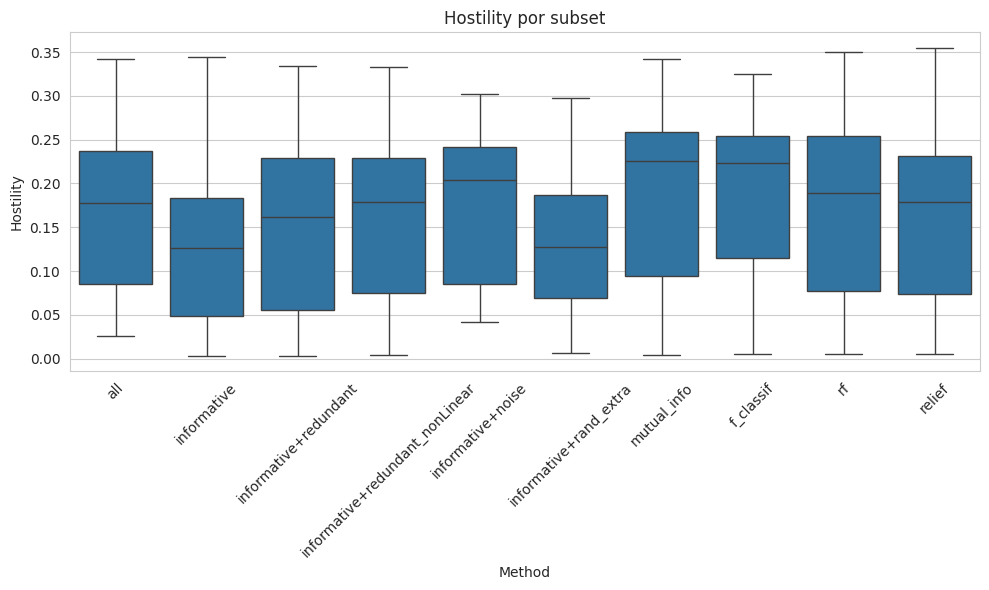

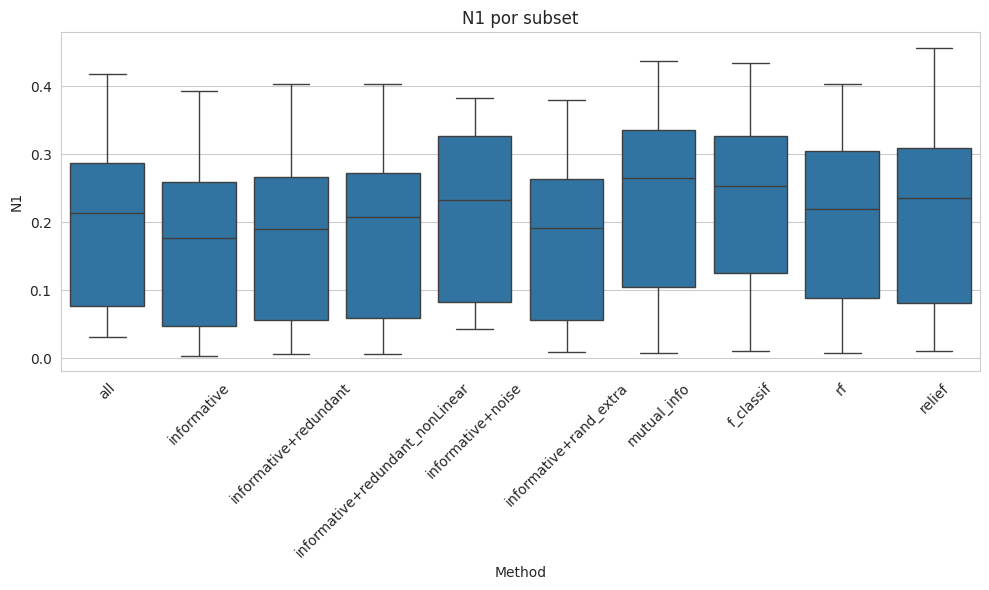

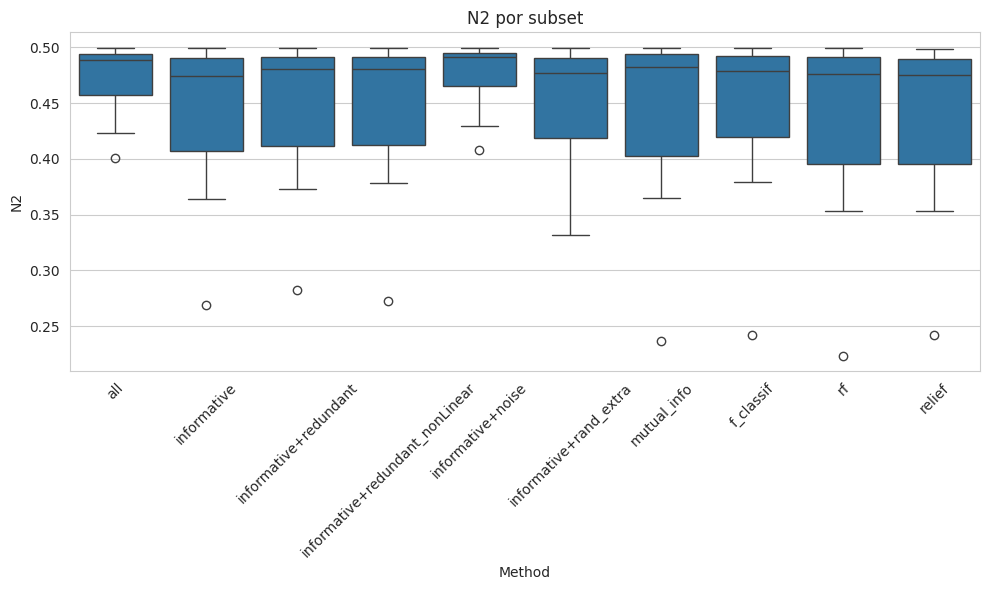

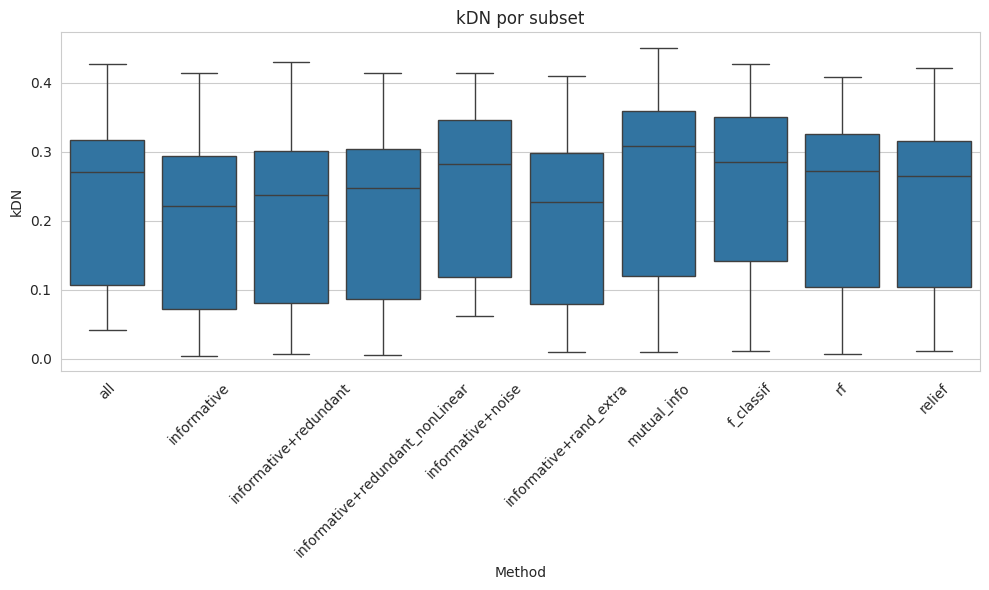

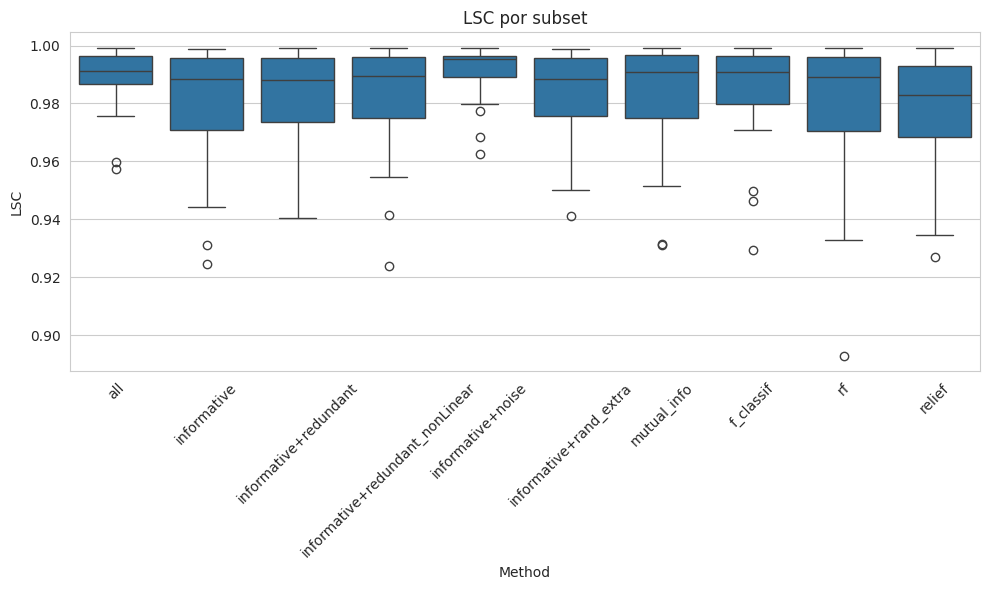

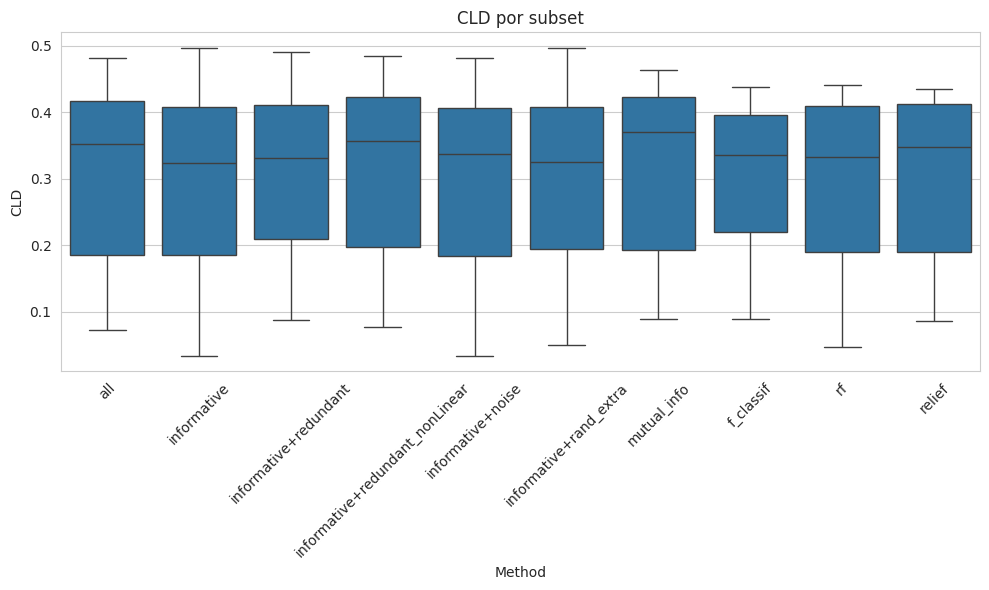

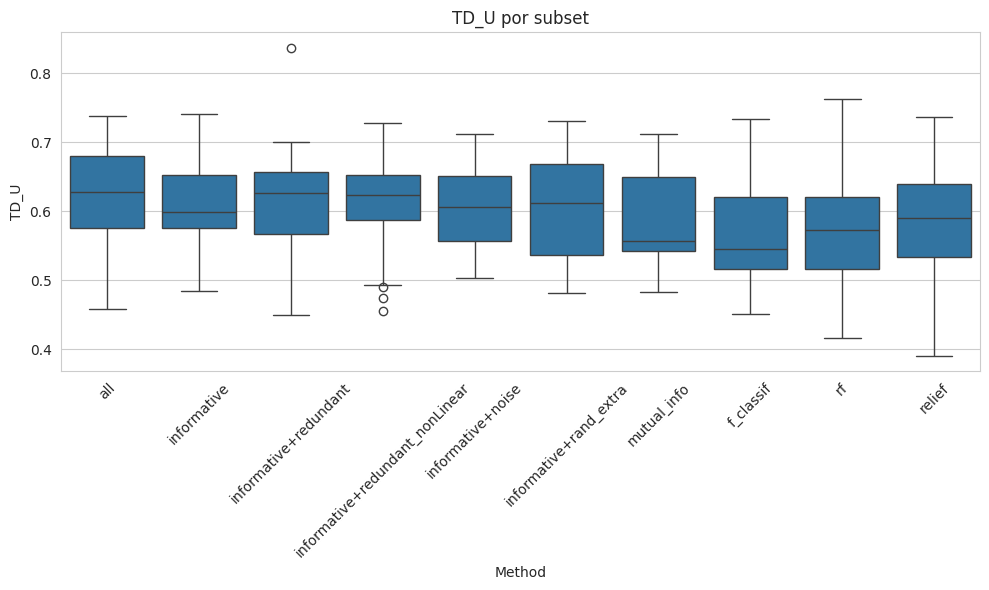

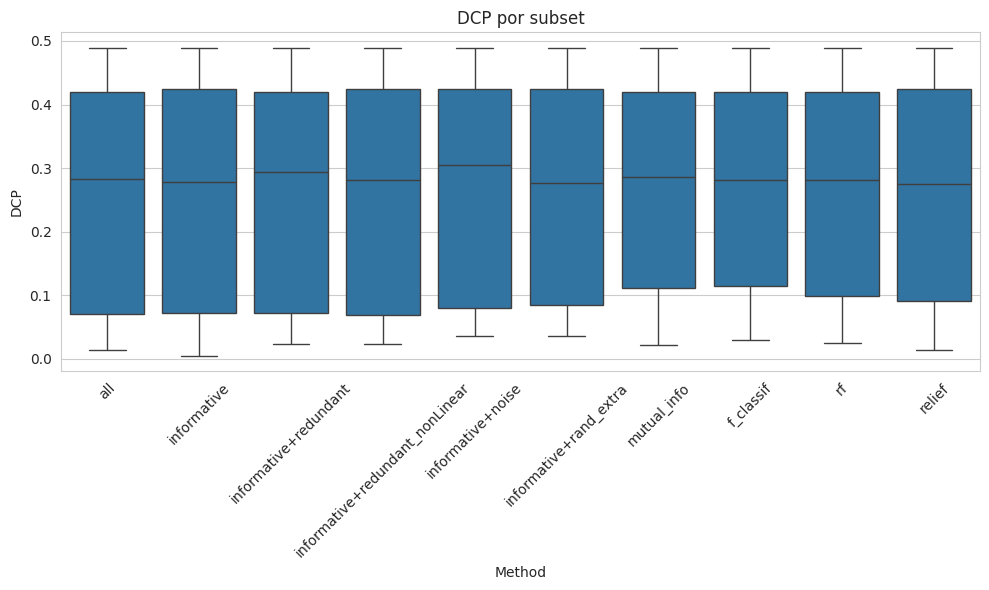

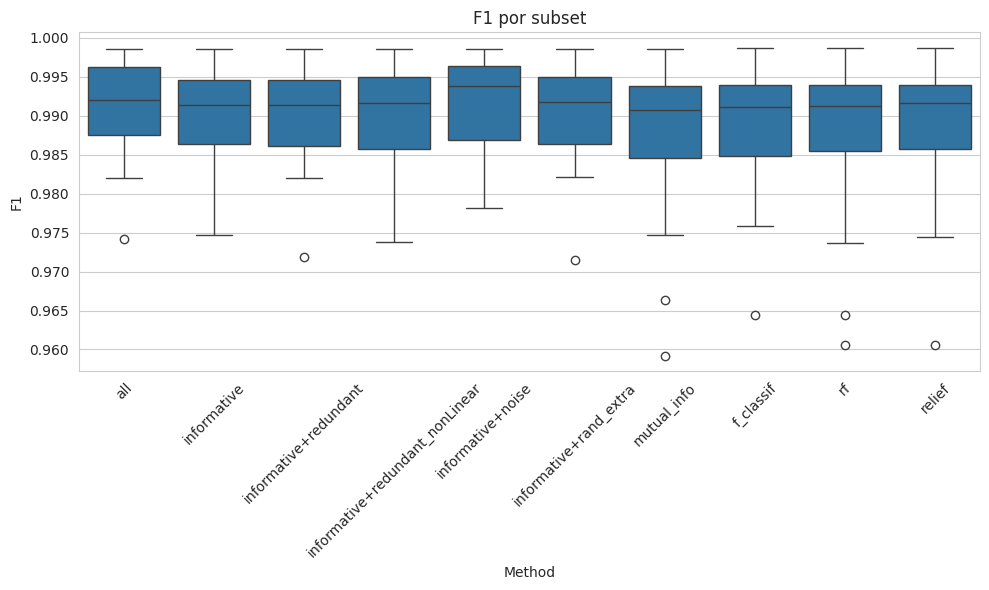

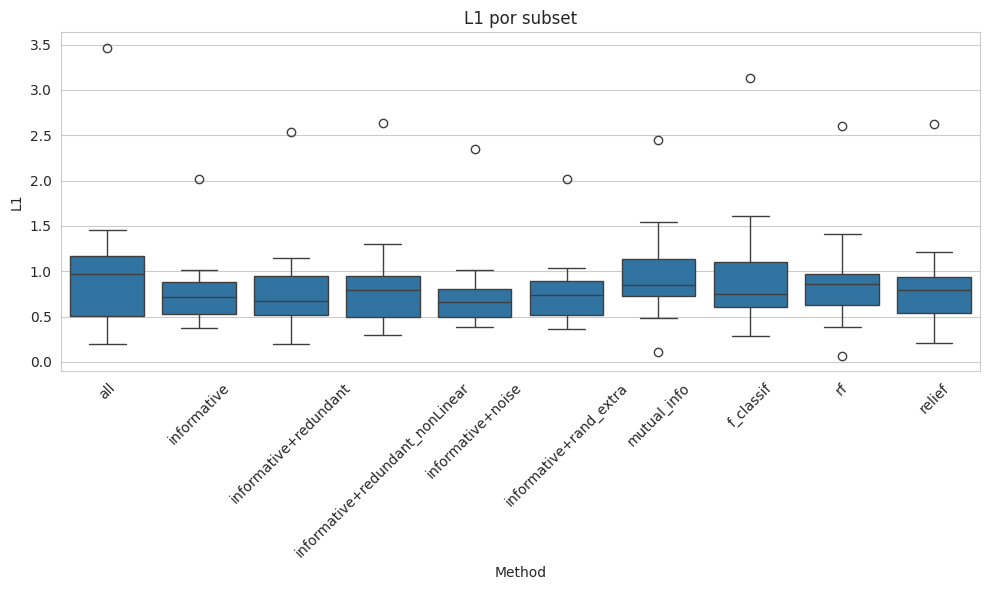

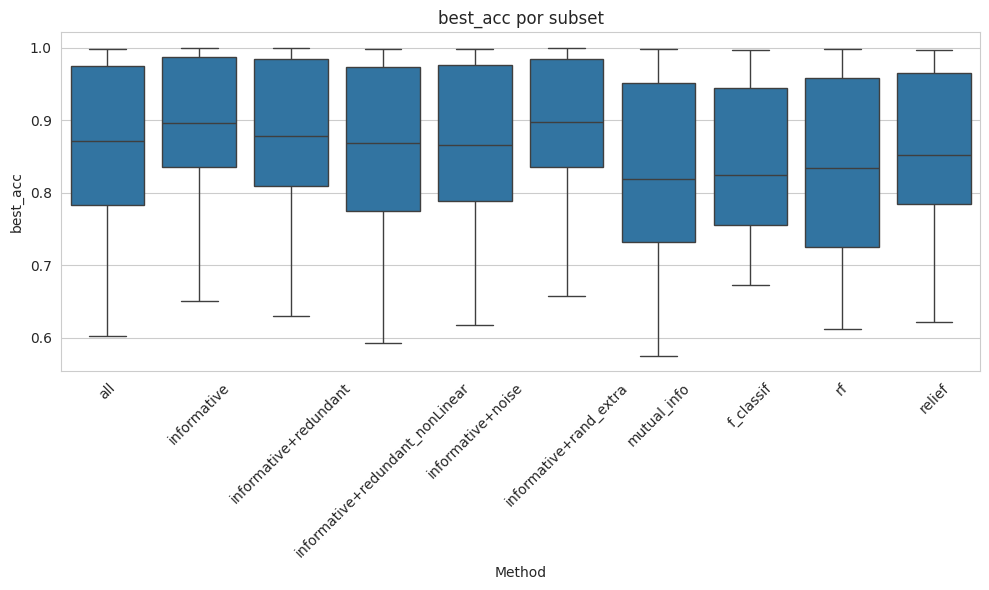

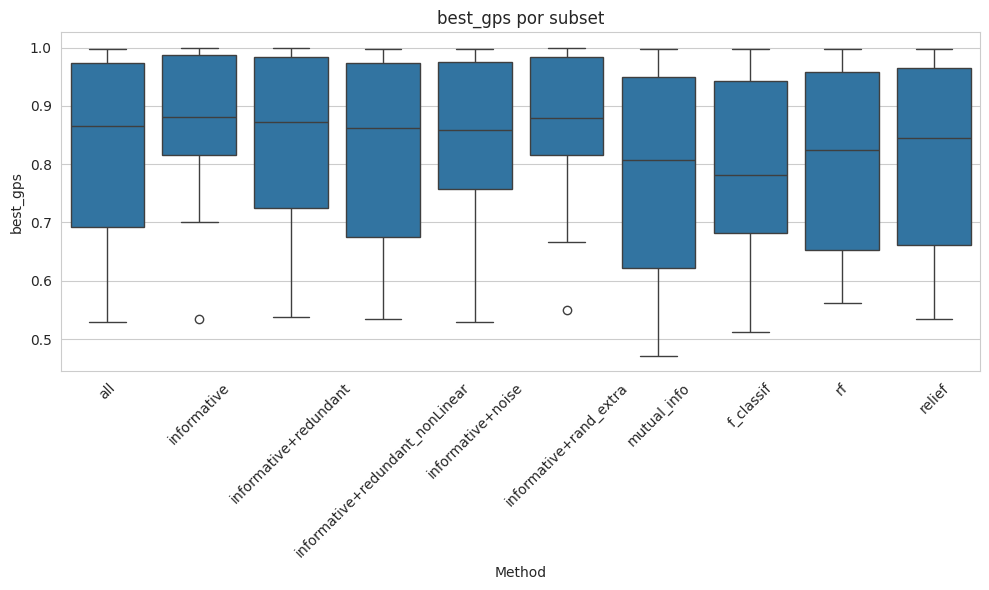

In [43]:
for measure in ["Hostility","N1","N2","kDN","LSC","CLD","TD_U","DCP","F1","L1","best_acc","best_gps"]:
    plot_boxplots(combined, measure)
    # plot_boxplots(combined, measure, savepath=f"boxplot_{measure}.png")

## Conclusiones generales

Las medidas que mejor funcionan son claramente: Hostility, N1 y kDN. Obtienen menor media, mediana y std para el conjunto informativo real de variables. Aunque es verdad que a veces la complejidad del subconjunto realmente informativo y del informativo + algún tipo de redundancia es similar.
Hostility y N1 (se basa en MST, hay un paper que hace FS aplicando clustering con MST) tienen un mayor coste computacional que kDN. El resto de medidas están un poco perdidas.

Vemos que estas medidas sí son capaces de identificar que el conjunto de variables informativas tiene una complejidad menor que el resto de subconjuntos. Ojo porque todas son medidas de neighborhood, no son de Feature. Esto es interesante porque no están enfocadas en eso, pero revela que detectan bien la estructura de los datos y la interrelación entre las clases.

Otra observación interesante es que ninguno de los métodos de filtro de FS del SOTA probados  logran una complejidad similar a la del subconjunto realmente informativo. RelieF y RF son los que mejores valores de complejidad (en el sentido de aproximarse a los valores de complejidad logrados por el subconjunto realmente informativo). Los  boxplots de accuracy y gps que arrojan muestran mucha varianza y un rango mayor que el que se logra con todas las variables.


Siguientes pasos:

   - Obtener más resultados para conjuntos más difíciles
   - Probar con mayor número de variables. También sería interesante ver cuándo petan estas medidas de complejidad por el curse of dimensionality.
      - ¡Ojo! habrá que hacer mucha experimentación con datasets artificiales porque se puede controlar cuáles son realmente las informativas. Hacer también búsqueda en el SOTA por si hay conjuntos reales en los que ya se saben cuáles son realmente las informativas.
   - Pensar algún método que nos ayude a seleccionar las variables en función de estas medidas.